# Exercise 1
#### Sasi Tummala

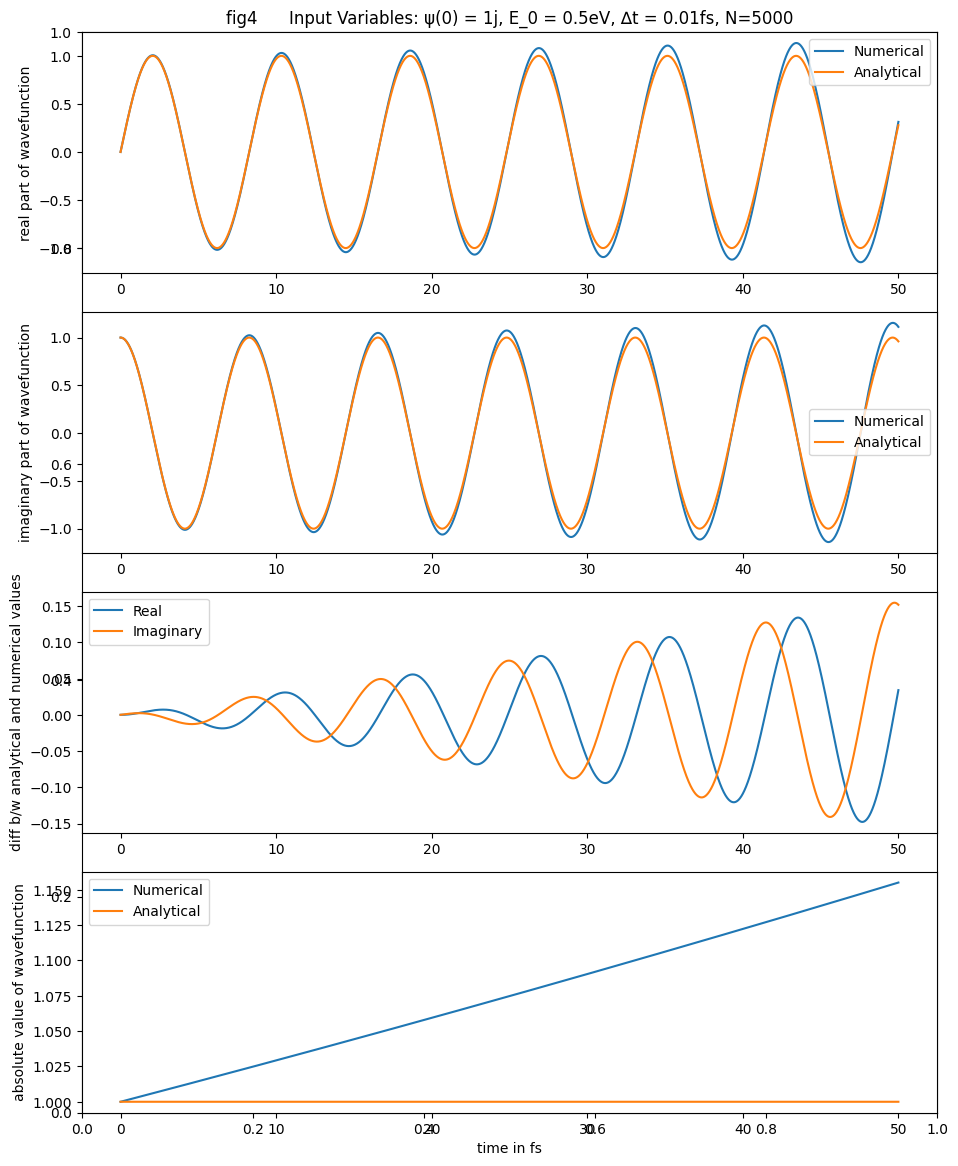

In [4]:
import numpy as np
import matplotlib.pyplot as plt

hbar = 0.6582119514

def read_input_file(file_path):
  with open(file_path, 'r') as file:
    lines = [line for line in file if not line.startswith('#')]
    psi_0 = complex(lines[0].strip())
    E_0 = float(lines[1].strip())
    Dt = float(lines[2].strip())
    N = int(lines[3].strip())
  return psi_0, E_0, Dt, N

def func(psi_0, E_0, Dt, N):
  T = np.linspace(0.0, N*Dt, num=N)
  Psi_N, Psi_A = [], []

  for i in range(N):
    Psi_A.append(psi_0*np.exp(complex(0, -E_0*T[i])/hbar))
    if i == 0:
      Psi_N.append(psi_0)
    else:
      Psi_N.append(Psi_N[i-1]*complex(1,-E_0*Dt/hbar))

  plt.figure(figsize=(10, 12))
  plt.title(f'fig4      Input Variables: ψ(0) = {psi_0}, E_0 = {E_0}eV, ∆t = {Dt}fs, N={N}')
  
  #real
  plt.subplot(4, 1, 1)
  plt.plot(T, [i.real for i in Psi_N], label='Numerical')
  plt.plot(T, [i.real for i in Psi_A], label='Analytical')
  plt.ylabel('real part of wavefunction')
  plt.legend()

  #imag
  plt.subplot(4, 1, 2)
  plt.plot(T, [i.imag for i in Psi_N], label='Numerical')
  plt.plot(T, [i.imag for i in Psi_A], label='Analytical')
  plt.ylabel('imaginary part of wavefunction')
  plt.legend()

  #diff
  plt.subplot(4, 1, 3)
  plt.plot(T, np.subtract([i.real for i in Psi_N], [i.real for i in Psi_A]), label='Real')
  plt.plot(T, np.subtract([i.imag for i in Psi_N], [i.imag for i in Psi_A]), label='Imaginary')
  plt.legend()
  plt.ylabel('diff b/w analytical and numerical values')

  #abs
  plt.subplot(4, 1, 4)
  plt.plot(T, np.abs(Psi_N), label='Numerical')
  plt.plot(T, np.abs(Psi_A), label='Analytical')
  plt.legend()
  plt.ylabel('absolute value of wavefunction')

  plt.xlabel('time in fs')
  plt.tight_layout()

  plt.show()

input_file_path = 'ex1-input.txt'
psi_0, E_0, Dt, N = read_input_file(input_file_path)
func(psi_0, E_0, Dt, N)

